# 1. 시각화


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/ESAA YB 2조/미니프로젝트2/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA YB 2조/미니프로젝트2/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/ESAA YB 2조/미니프로젝트2/data/sample_submission.csv')

- index 구분자
- quality 품질
- fixed acidity 산도
- volatile acidity 휘발성산
- citric acid 시트르산
- residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
- chlorides 염화물
- free sulfur dioxide 독립 이산화황
- total sulfur dioxide 총 이산화황
- density 밀도
- pH 수소이온농도
- sulphates 황산염
- alcohol 도수
- type 종류

In [3]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [5]:
submission.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [6]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [7]:
train.isnull().sum() # 결측치 없음

,0
index,0
quality,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0


In [8]:
test.isnull().sum() #결측치 없음

,0
index,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [9]:
submission.isnull().sum() #결측치 없음

,0
index,0
quality,0


In [10]:
test.describe()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,7.243850,0.347930,0.319130,5.47160,0.057275,31.117000,116.723500,0.994825,3.213000,0.535360,10.419693
std,288.819436,1.344372,0.172043,0.146561,4.76628,0.037048,18.156527,57.808145,0.002912,0.161165,0.145525,1.180694
min,0.000000,4.200000,0.080000,0.000000,0.70000,0.014000,1.000000,7.000000,0.988150,2.720000,0.230000,8.400000
25%,249.750000,6.400000,0.230000,0.240000,1.80000,0.039000,17.750000,76.750000,0.992448,3.100000,0.437500,9.500000
50%,499.500000,7.000000,0.300000,0.300000,2.90000,0.048000,29.000000,118.500000,0.995130,3.200000,0.510000,10.200000
75%,749.250000,7.700000,0.410000,0.392500,8.20000,0.067250,42.000000,156.000000,0.997060,3.312500,0.620000,11.200000
max,999.000000,15.600000,1.240000,0.810000,22.60000,0.611000,122.500000,289.000000,1.003150,3.780000,1.310000,14.000000


### 'fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates'에 대한 히스토그램과 박스플롯

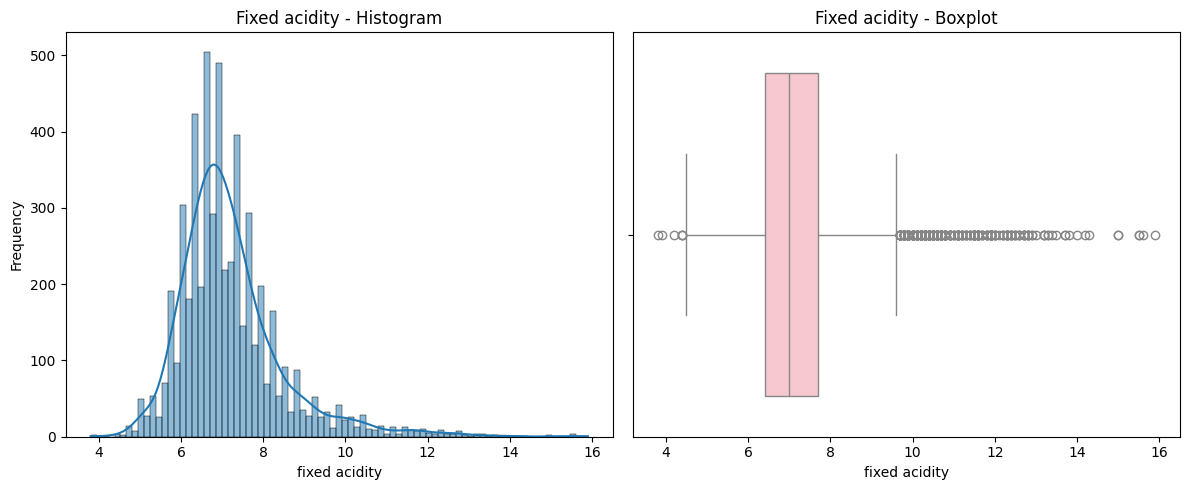

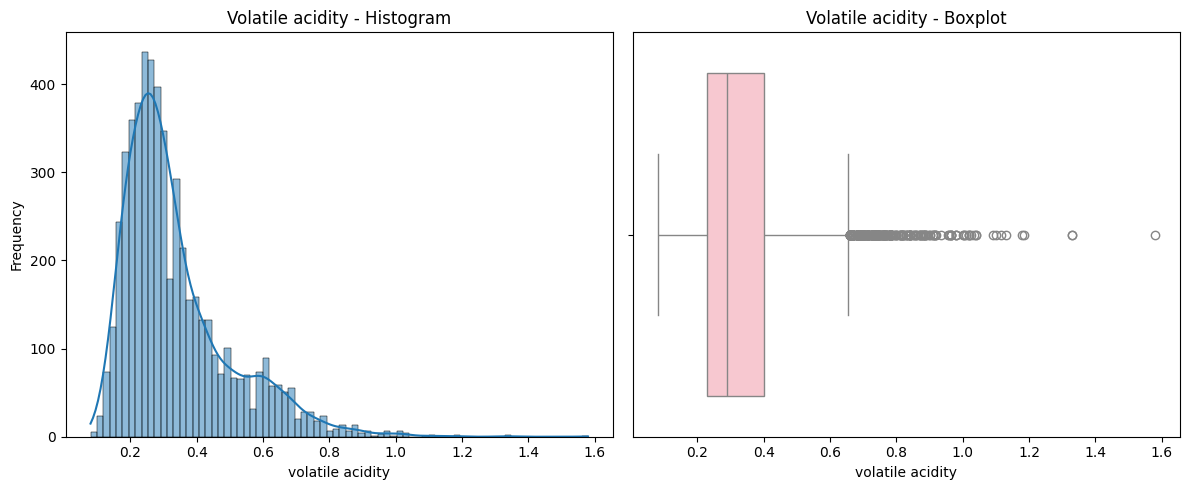

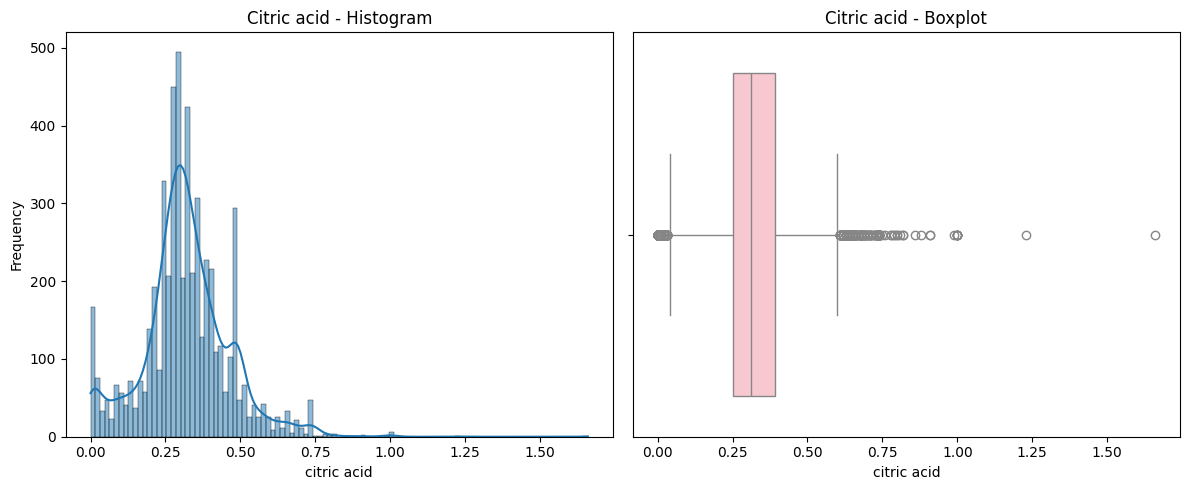

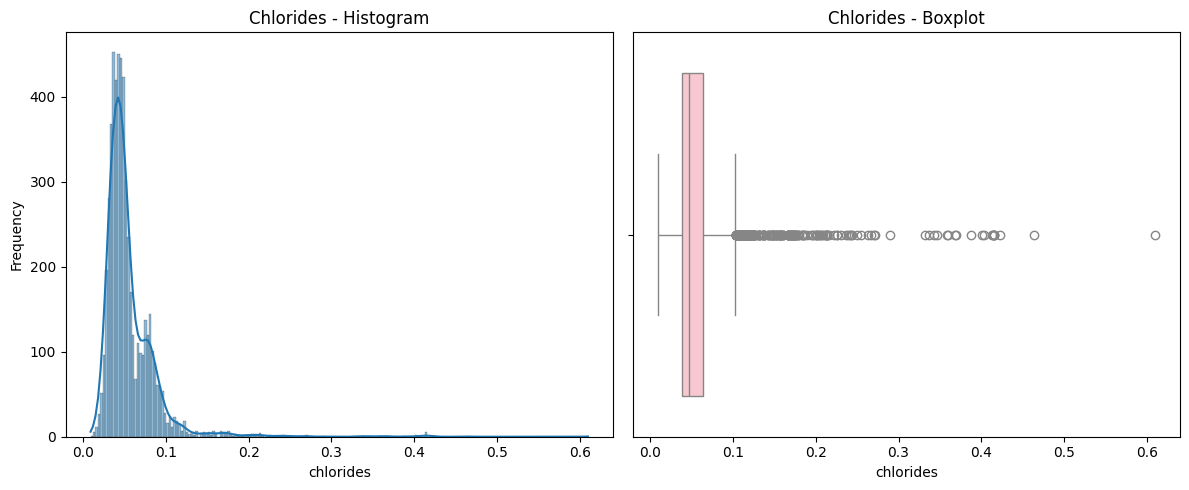

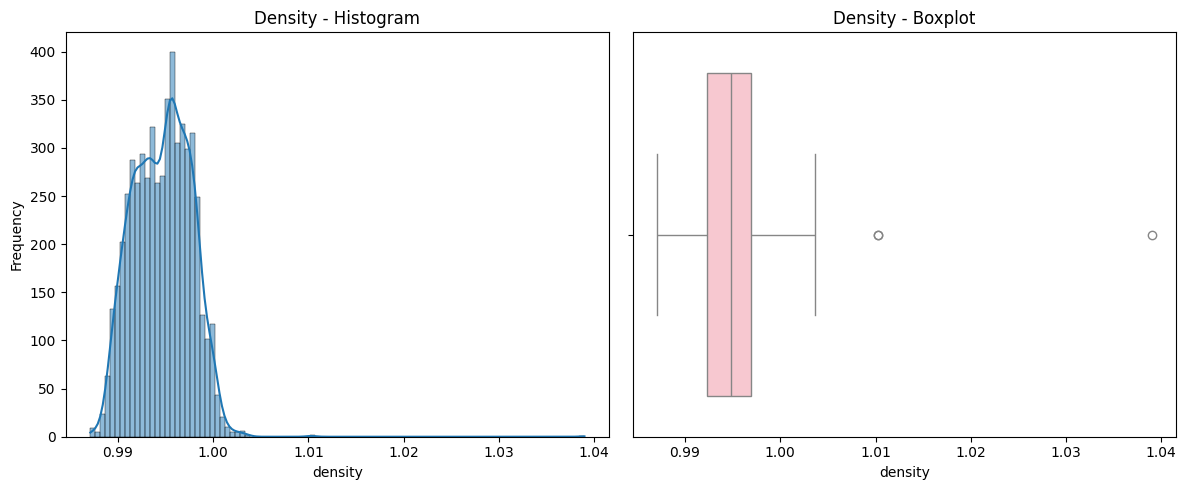

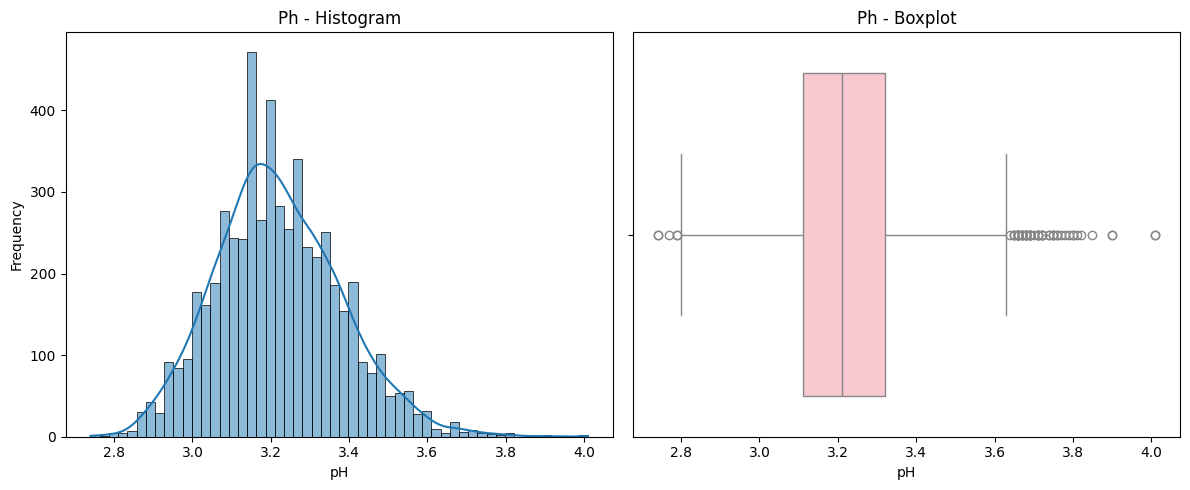

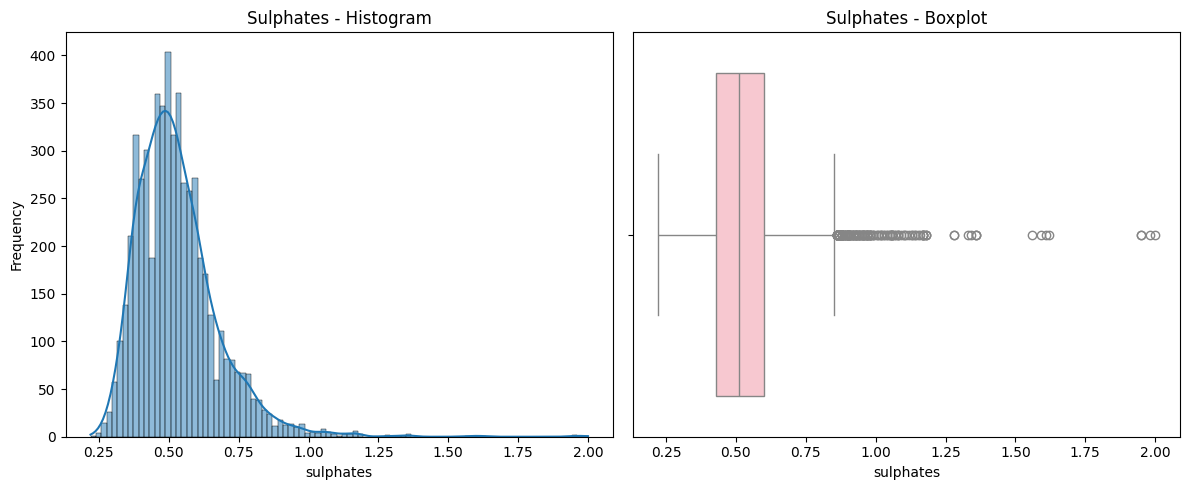

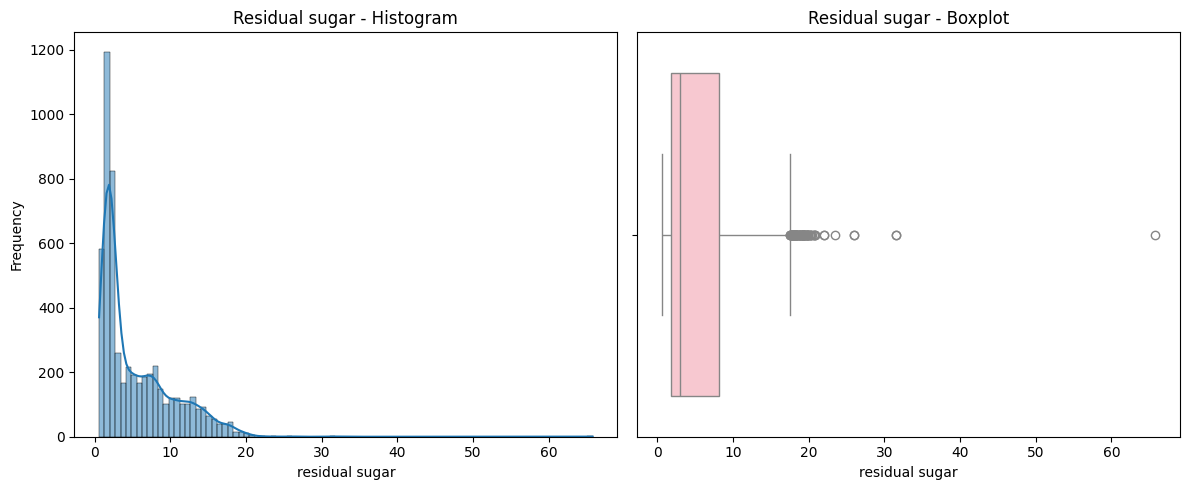

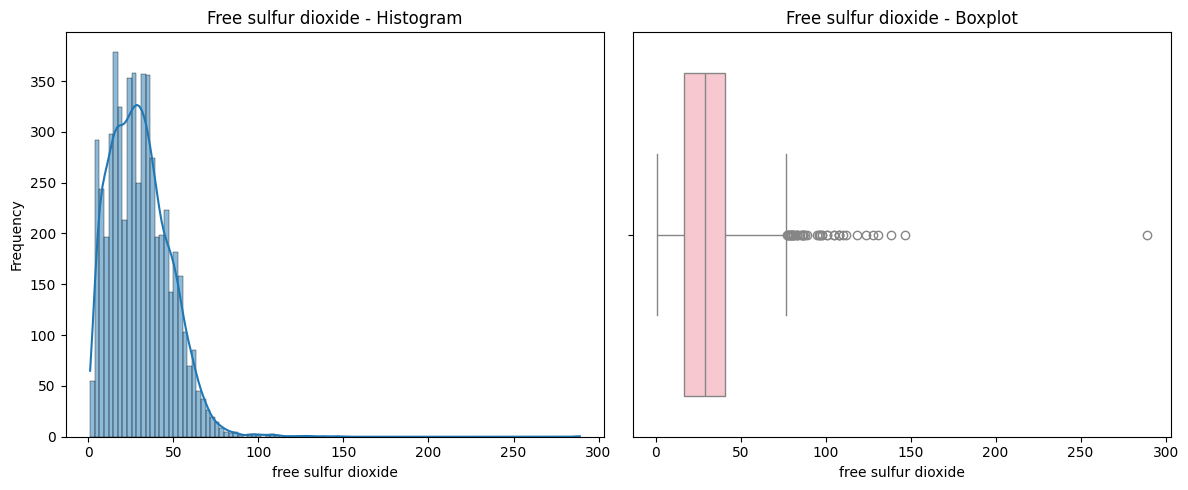

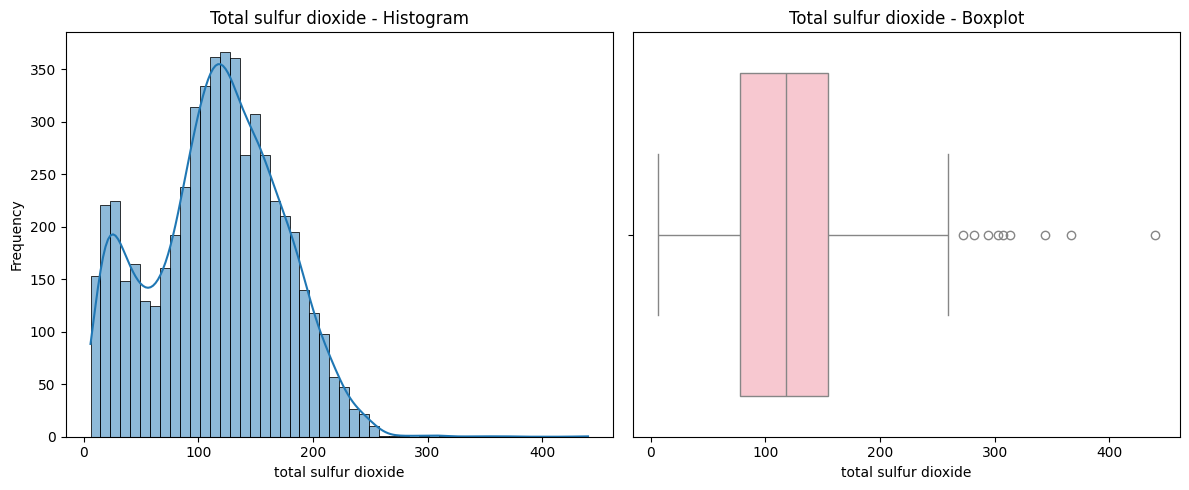

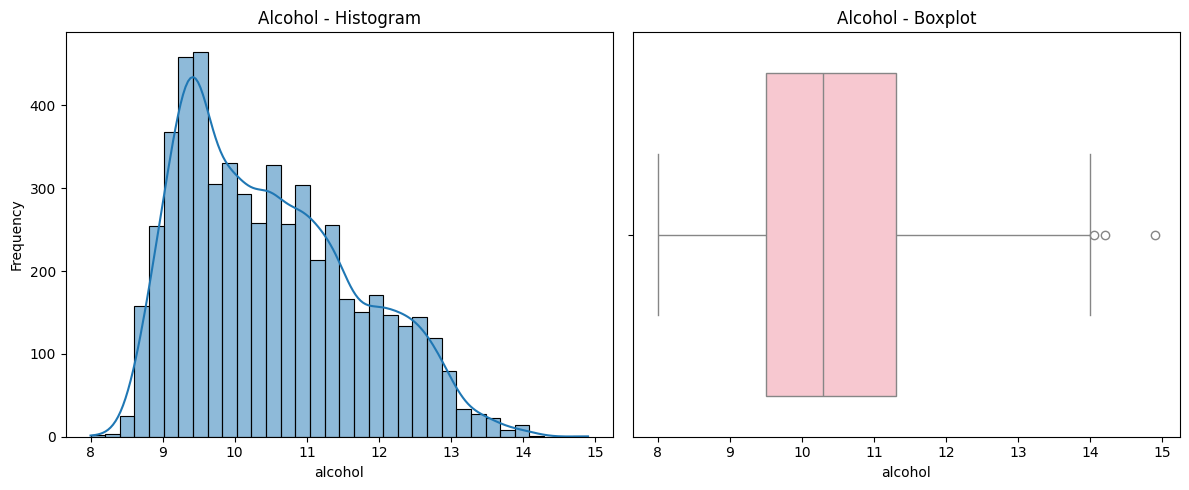

In [11]:
# 시각화를 위한 변수 리스트
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
    'density', 'pH', 'sulphates', 'residual sugar',
    'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']

# 각 변수에 대해 히스토그램과 박스플롯을 그리기
for var in variables:
    plt.figure(figsize=(12, 5))

    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(train[var], kde=True)
    plt.title(f'{var.capitalize()} - Histogram')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train[var], color='pink')
    plt.title(f'{var.capitalize()} - Boxplot')
    plt.xlabel(var)

    # 플롯 간격 조정
    plt.tight_layout()
    plt.show()

### 'type'에 대한 바플롯

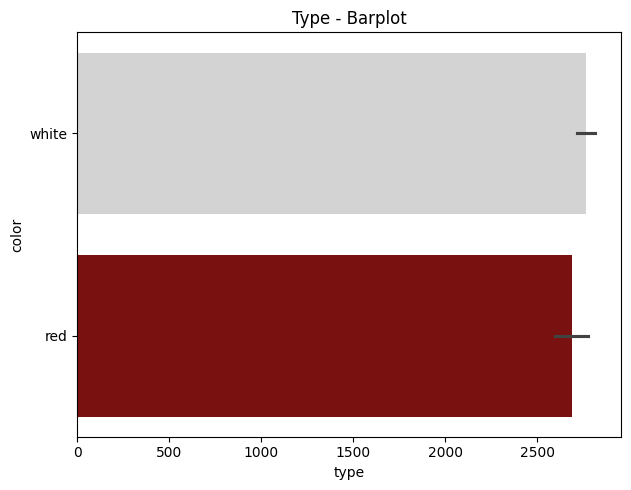

In [12]:
 plt.figure(figsize=(12, 5))

  # 바 플롯
 plt.subplot(1, 2, 1)
 sns.barplot(train['type'],palette=['lightgrey','darkred'])
 plt.title('Type - Barplot')
 plt.xlabel('type')
 plt.ylabel('color')


 # 플롯 간격 조정
 plt.tight_layout()
 plt.show()

### 'quality'에 대한 히스토그램

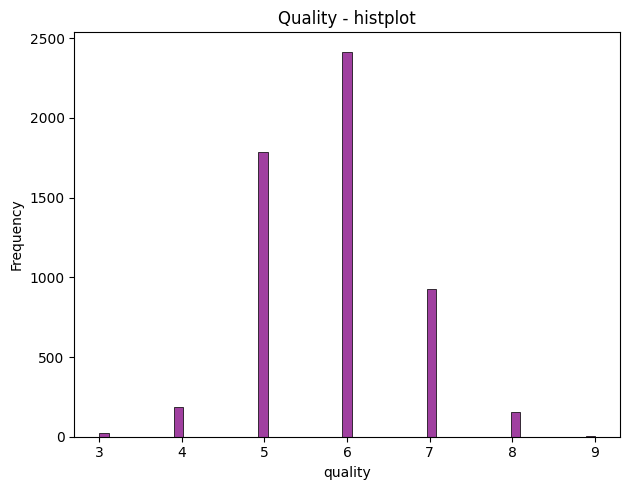

In [13]:
plt.figure(figsize=(12, 5))

 # 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(train['quality'],color='purple')
plt.title('Quality - histplot')
plt.xlabel('quality')
plt.ylabel('Frequency')

 # 플롯 간격 조정
plt.tight_layout()
plt.show()

# 2. 전처리

1.  'index' 칼럼 제거


In [5]:
train = train.drop('index', axis=1)
test = test.drop('index', axis=1)

In [6]:
train.head(3)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


In [16]:
test.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.9938,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.0004,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.9948,3.19,0.69,9.4,white


In [17]:
# train 데이터의 type 변수 확인
train['type'].value_counts()

# test 데이터의 type 변수 확인
test['type'].value_counts()

,count
type,
white,739
red,261


2. 'type' categorical 변수 -> 레이블 인코딩
 - 0 : white
 - 1 : red

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['type'])
le.fit(test['type'])
train['type'] = le.fit_transform(train['type'])
test['type'] = le.transform(test['type'])

In [19]:
train.head(3)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1


In [20]:
test.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.9938,2.90,0.38,11.6,1
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.0004,3.06,0.49,9.0,0
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.9948,3.19,0.69,9.4,1


<Axes: >

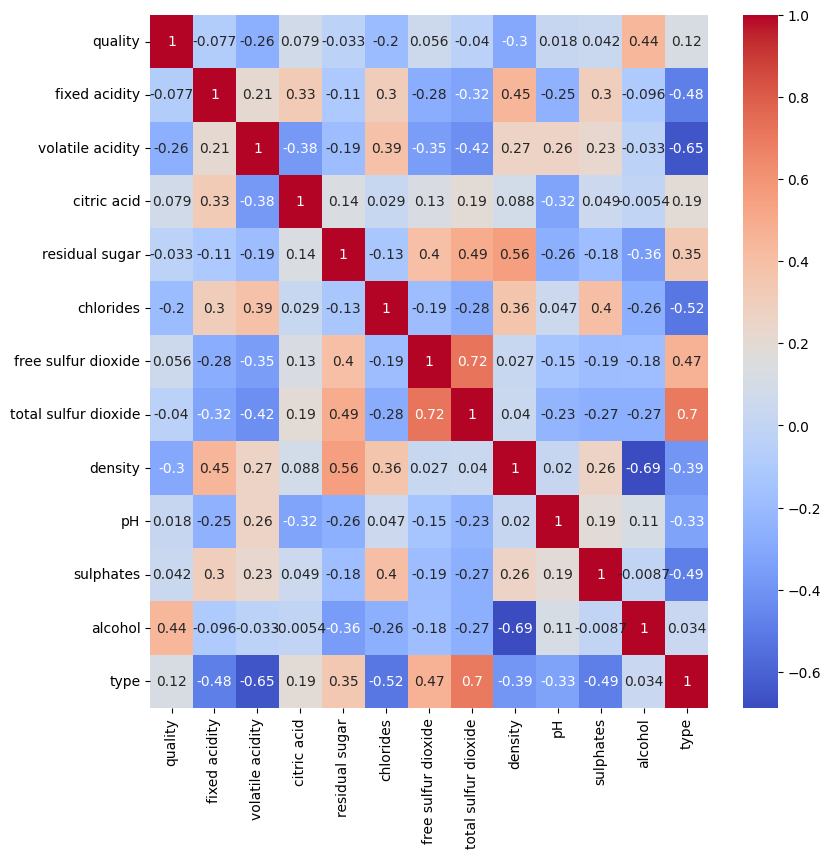

In [21]:
plt.figure(figsize=(9, 9))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm')

<Axes: >

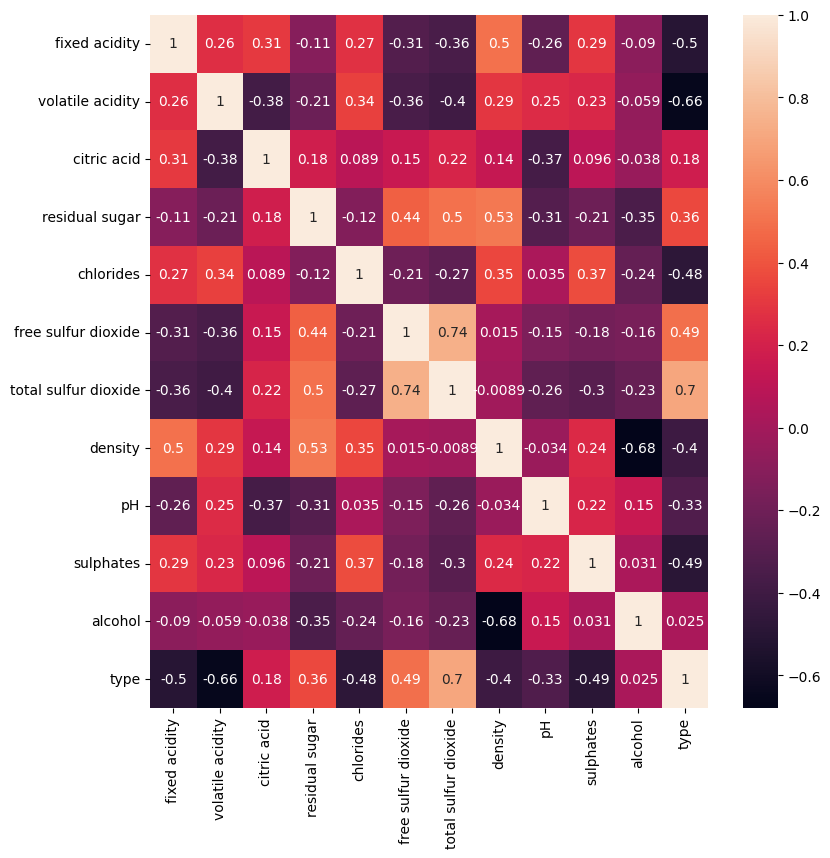

In [22]:
plt.figure(figsize=(9, 9))
sns.heatmap(test.corr(),annot=True)

3. 범위가 큰 변수들에 대한 표준화
- StandardScaler (평균 0, 표준편차 1로 변환)


 ** 표준화 한 게 별로면 이 코드 지워도 됨!! **

In [23]:
#from sklearn.preprocessing import StandardScaler

#features_to_scale = ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

#scaler = StandardScaler()

#train[features_to_scale] = scaler.fit_transform(train[features_to_scale])

#test[features_to_scale] = scaler.transform(test[features_to_scale])

In [24]:
#train.head(3)

In [25]:
#test.head(3)

4. 이상치 값은 삭제 x, 데이터가 skewed되어있기에 평균값 대신 중앙값으로 대체
** 이것도 해야할 필요없으면 안해도됨!!**

- 이상치 값 그대로 냅두면서 실습할꺼다 -> train, test 데이터 사용하면 되고
- 이상치 값을 중앙값으로 대체해 사용할꺼다 -> train_cleaned, test_cleaned 데이터 사용하기!

In [8]:
import pandas as pd
import numpy as np

# 이상치를 중앙값으로 대체하는 함수
def replace_outliers_with_median(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 1사분위수
        Q3 = df[col].quantile(0.75)  # 3사분위수
        IQR = Q3 - Q1  # IQR 계산
        median = df[col].median()  # 중앙값

        # 이상치 판별: Q1 - 1.5 * IQR 이하, Q3 + 1.5 * IQR 이상
        df[col] = np.where((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)), median, df[col])

    return df

# 처리할 변수 목록
features_to_check = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

train_cleaned = replace_outliers_with_median(train, features_to_check)

test_cleaned = replace_outliers_with_median(test, features_to_check)

In [27]:
train_cleaned.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.003911,0.310593,0.318101,5.118028,0.050286,29.815627,115.228124,0.994660,3.214732,0.515578,10.502690,0.756595
std,0.870311,0.882041,0.119807,0.105417,4.275634,0.017745,16.189181,55.611897,0.002939,0.151570,0.117248,1.191058,0.429177
min,3.000000,4.500000,0.080000,0.040000,0.600000,0.009000,1.000000,6.000000,0.987110,2.800000,0.220000,8.000000,0.000000
25%,5.000000,6.400000,0.230000,0.260000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,1.000000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,1.000000
75%,6.000000,7.500000,0.360000,0.380000,7.800000,0.058000,41.000000,155.000000,0.996930,3.320000,0.590000,11.300000,1.000000
max,9.000000,9.600000,0.655000,0.600000,17.500000,0.103000,77.000000,259.000000,1.003690,3.630000,0.850000,14.000000,1.000000


In [28]:
test_cleaned.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0000
mean,6.992550,0.321430,0.311130,5.311450,0.051990,30.292500,116.393500,0.994825,3.20793,0.525350,10.412093,0.7390
std,0.857638,0.128947,0.116248,4.574855,0.019032,16.795812,57.323066,0.002912,0.15174,0.127472,1.169792,0.4394
min,4.800000,0.080000,0.020000,0.700000,0.014000,1.000000,7.000000,0.988150,2.79000,0.230000,8.400000,0.0000
25%,6.400000,0.230000,0.250000,1.800000,0.039000,17.750000,76.750000,0.992448,3.10000,0.437500,9.500000,0.0000
50%,7.000000,0.300000,0.300000,2.900000,0.048000,29.000000,118.250000,0.995130,3.20000,0.510000,10.200000,1.0000
75%,7.500000,0.380000,0.372500,8.000000,0.061000,41.000000,156.000000,0.997060,3.31000,0.600000,11.200000,1.0000
max,9.600000,0.675000,0.620000,17.600000,0.108000,78.000000,272.000000,1.003150,3.63000,0.890000,13.700000,1.0000


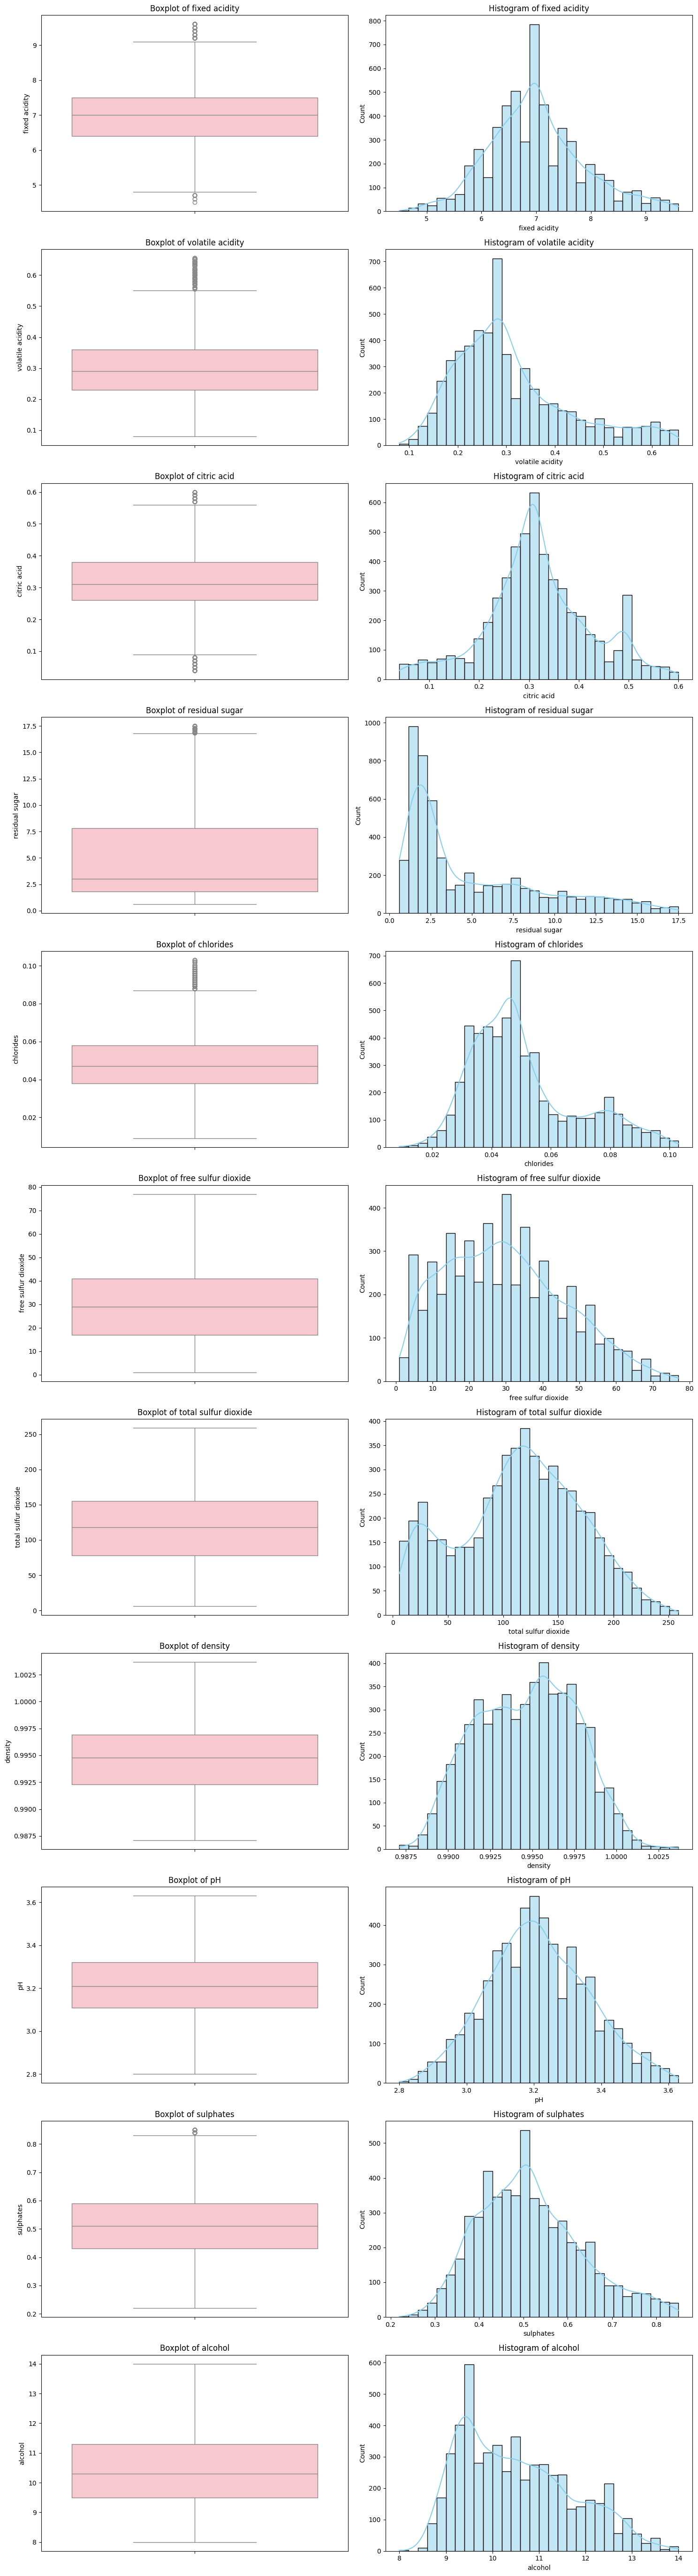

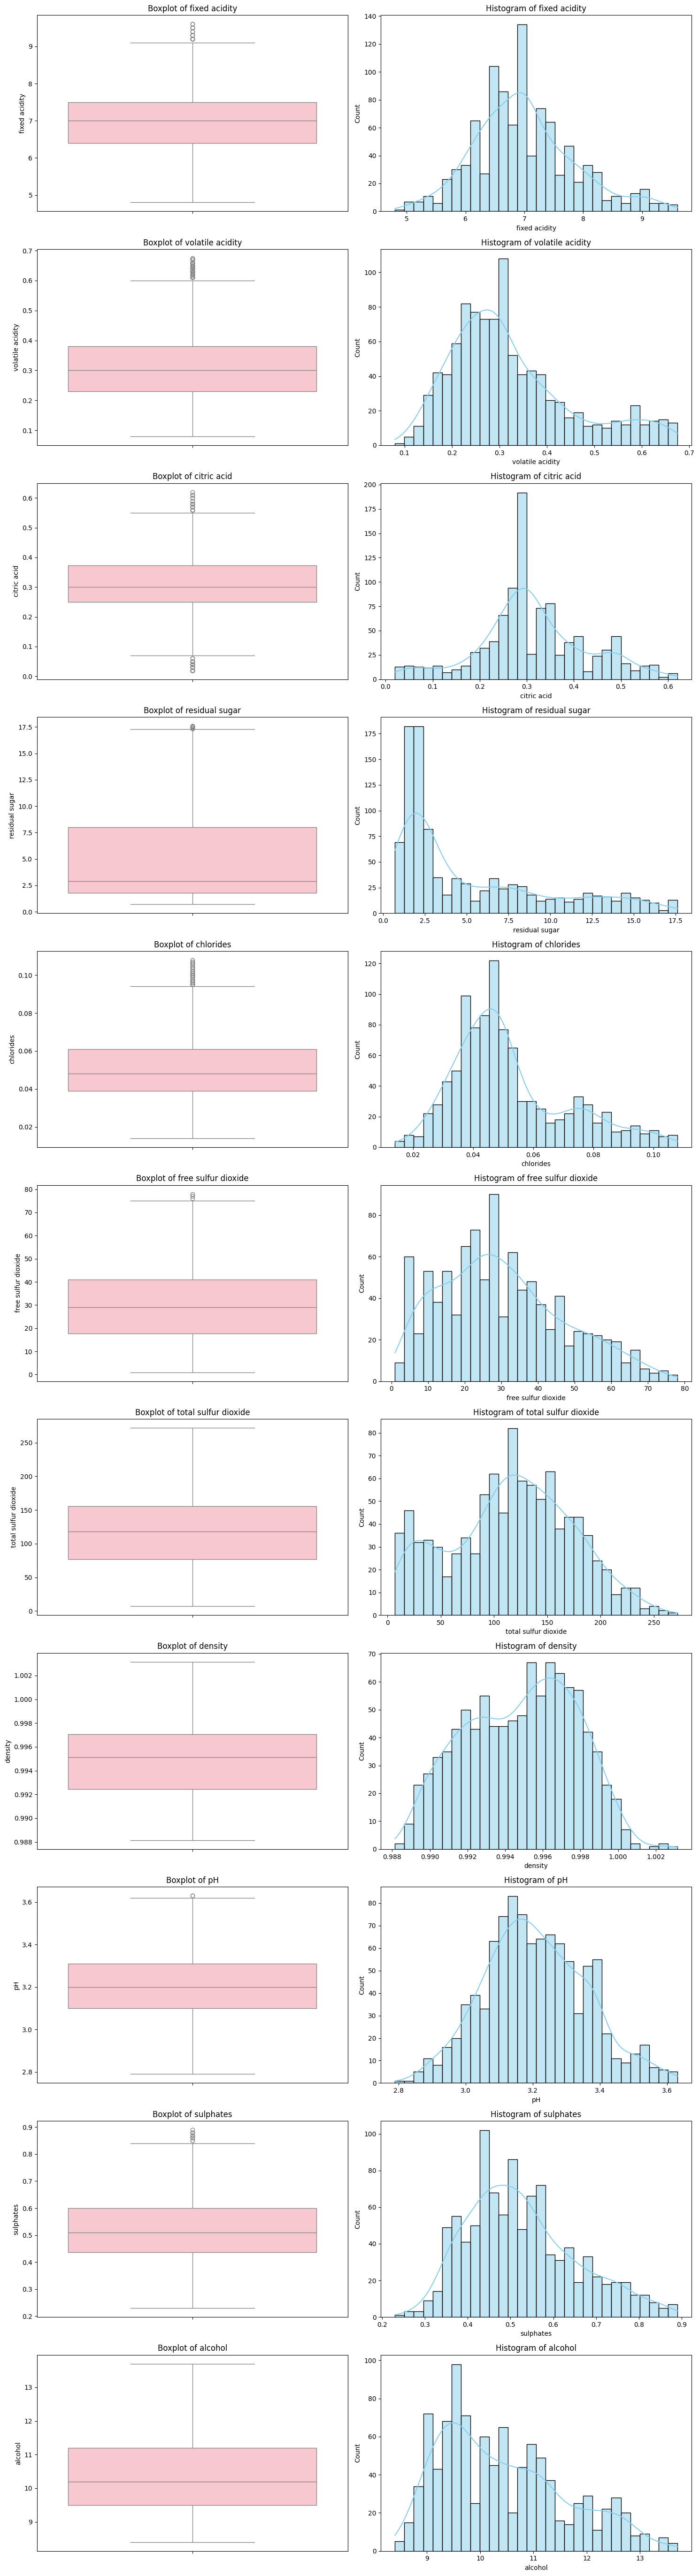

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 함수
def plot_box_and_histogram(df, columns):
    num_cols = len(columns)

    # 박스플롯과 히스토그램을 한 화면에 그리기
    plt.figure(figsize=(15, 5 * num_cols))  # figsize 조정

    for i, col in enumerate(columns):
        plt.subplot(num_cols, 2, i * 2 + 1)  # 박스플롯
        sns.boxplot(data=df, y=col, color='pink')
        plt.title(f'Boxplot of {col}')

        plt.subplot(num_cols, 2, i * 2 + 2)  # 히스토그램
        sns.histplot(data=df, x=col, color='skyblue', bins=30, kde=True)
        plt.title(f'Histogram of {col}')

    plt.tight_layout()
    plt.show()

# 박스플롯과 히스토그램 그리기
plot_box_and_histogram(train_cleaned, features_to_check)
plot_box_and_histogram(test_cleaned, features_to_check)

# 3. 모델 구현

## Random Forest

리더보드 점수 : 0.681

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

### 데이터 준비

In [10]:
X = train.drop(columns=['quality'])
y = train['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
2845,9.2,0.28,0.41,1.0,0.042,14.0,59.0,0.99220,2.96,0.25,10.5,1
957,5.9,0.20,0.28,1.0,0.043,45.0,100.0,0.99033,3.40,0.41,11.4,1
2569,7.3,0.20,0.39,2.3,0.048,24.0,87.0,0.99044,2.94,0.35,12.0,1
4449,6.9,0.33,0.31,4.2,0.040,21.0,93.0,0.98960,3.18,0.48,13.4,1
5449,6.7,0.41,0.27,2.6,0.033,25.0,85.0,0.99086,3.05,0.34,11.7,1


In [32]:
y_train.head()

,quality
2845,6
957,6
2569,6
4449,7
5449,6


In [33]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1859,6.5,0.20,0.33,1.5,0.039,36.0,110.0,0.99008,3.22,0.65,12.0,1
691,7.3,0.22,0.37,14.3,0.063,48.0,191.0,0.99780,2.89,0.38,9.0,1
1858,7.7,0.58,0.31,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,0
1101,7.0,0.29,0.43,2.3,0.059,15.0,31.0,0.99660,3.15,0.57,11.0,0
5010,7.0,0.40,0.37,1.9,0.081,17.0,29.0,0.99674,3.12,0.65,11.2,0


In [34]:
y_test.head()

,quality
1859,6
691,6
1858,7
1101,5
5010,6


### 모델 구현

In [11]:
#모델 구현
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.75      0.09      0.15        35
           5       0.72      0.72      0.72       351
           6       0.66      0.78      0.72       493
           7       0.68      0.55      0.60       183
           8       0.87      0.38      0.53        34
           9       0.00      0.00      0.00         1

    accuracy                           0.69      1100
   macro avg       0.52      0.36      0.39      1100
weighted avg       0.69      0.69      0.67      1100



In [36]:
pd.DataFrame({'True': y_test[:15].values, 'Predicted': y_pred[:15]})

,True,Predicted
0,6,6
1,6,6
2,7,7
3,5,6
4,6,6
5,5,5
6,5,6
7,6,6
8,6,6
9,5,6


### 하이퍼파라미터 튜닝

In [12]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_rf = GridSearchCV(rf_model, param_grid=params, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X, y)
print('Best Parameters:', grid_rf.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [13]:
best_rf_model = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
best_rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

### 피처 중요도

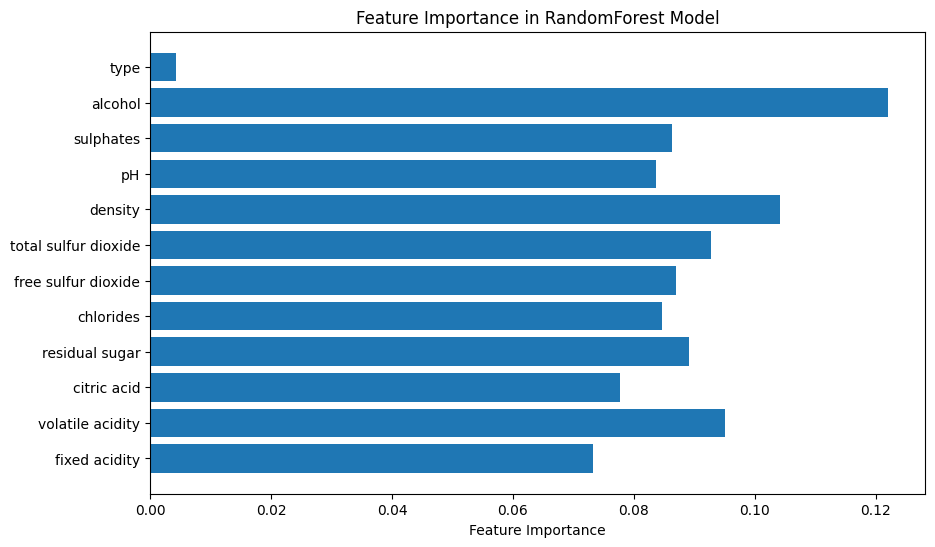

In [39]:
# Feature Importance
import matplotlib.pyplot as plt
importances = best_rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in RandomForest Model")
plt.show()

### 최종 예측 정리

In [40]:
test_pred = best_rf_model.predict(test)
submission['quality'] = test_pred
submission.to_csv('RandomForest_submission.csv', index=False)

from google.colab import files
files.download('RandomForest_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## GBM
리더보드 점수: 0.65517

### 전처리

In [14]:
X = train_cleaned.drop(columns=['quality'])
y = train_cleaned['quality']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['type'])
le.fit(test['type'])
train['type'] = le.fit_transform(train['type'])
test['type'] = le.transform(test['type'])

### 모델 구현

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbm_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_clf.fit(X_train, y_train)
y_pred = gbm_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


In [43]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.33      0.14      0.20        35
           5       0.61      0.56      0.59       351
           6       0.56      0.70      0.62       493
           7       0.56      0.36      0.44       183
           8       0.62      0.29      0.40        34
           9       0.00      0.00      0.00         1

    accuracy                           0.57      1100
   macro avg       0.38      0.30      0.32      1100
weighted avg       0.57      0.57      0.56      1100



### 하이퍼파라미터 튜닝

In [16]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_gbm = GridSearchCV(gbm_clf, param_grid=params, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=1)
grid_gbm.fit(X, y)
print('Best Parameters:', grid_gbm.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


###피처 중요도

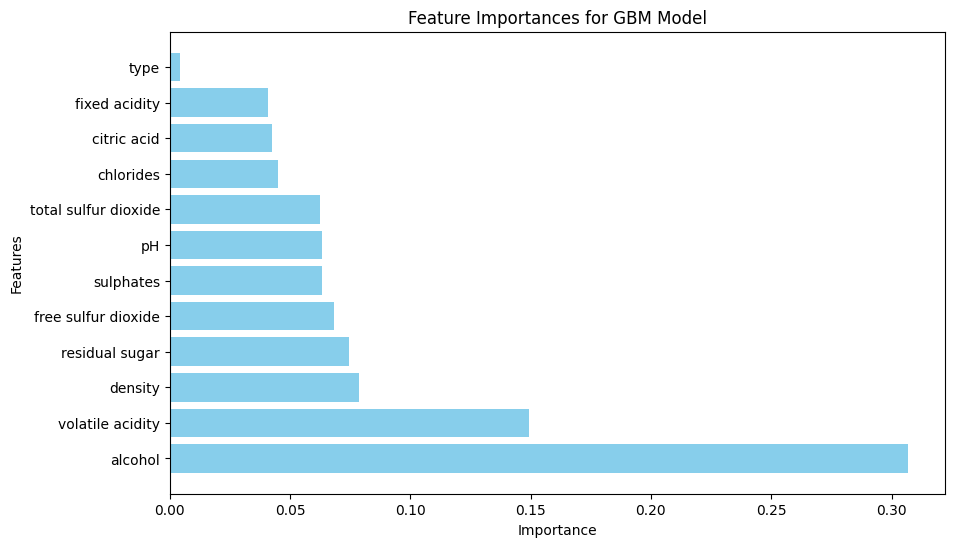

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# 특성 중요도 추출
feature_importances = gbm_clf.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importances for GBM Model")
plt.show()

###최종 예측 정리

In [46]:
gbm_clf.fit(X,y)
pred = gbm_clf.predict(test_cleaned)

submission['quality'] = pred
submission

,index,quality
0,0,6
1,1,5
2,2,6
3,3,6
4,4,6
...,...,...
995,995,5
996,996,6
997,997,5
998,998,6


In [47]:
submission.to_csv('gbm.csv', index=False)

## XG Boost

리더보드 점수: 0.701

#### 전처리

In [17]:
from sklearn.model_selection import train_test_split

X = train_cleaned.drop(columns=['quality'])
y = train_cleaned['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 모델 구현

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# 레이블을 0부터 시작하도록 임시 조정
y_train_adjusted = y_train - 3
y_test_adjusted = y_test - 3

# 모델 구현
xgb_clf = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train_adjusted)

# 예측 (예측 결과도 0부터 시작하는 레이블로 나옴)
y_pred_adjusted = xgb_clf.predict(X_test)

# 예측 결과를 원래 레이블로 되돌리기
y_pred = y_pred_adjusted + 3

# 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.36      0.14      0.20        35
           5       0.71      0.69      0.70       351
           6       0.65      0.74      0.69       493
           7       0.60      0.54      0.57       183
           8       0.76      0.38      0.51        34
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1100
   macro avg       0.44      0.36      0.38      1100
weighted avg       0.65      0.66      0.65      1100



#### 하이퍼파라미터 튜닝

In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier

# 레이블을 0부터 시작하도록 임시 조정
y_adjusted = y - 3

# 파라미터 설정
params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10]
}

# Stratified K-Fold 설정
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_xgb = GridSearchCV(xgb_clf,
                        param_grid=params, cv=stratified_kfold, n_jobs=-1, verbose=1, scoring='accuracy')
grid_xgb.fit(X, y_adjusted)

# 최적 파라미터 출력
print('Best Parameters:', grid_xgb.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [44]:
best_xgb_model = XGBClassifier(**grid_xgb.best_params_, random_state=42, use_label_encoder=False, eval_metric='logloss')

# 전체 레이블을 0부터 시작하도록 임시 조정
y_adjusted = y - 3

# 모델 학습
best_xgb_model.fit(X, y_adjusted)

# 필요시 이후 평가 단계에서 예측 결과를 원래 레이블로 복구
y_pred_adjusted = best_xgb_model.predict(X_test)
y_pred = y_pred_adjusted + 3

#### 피처 중요도

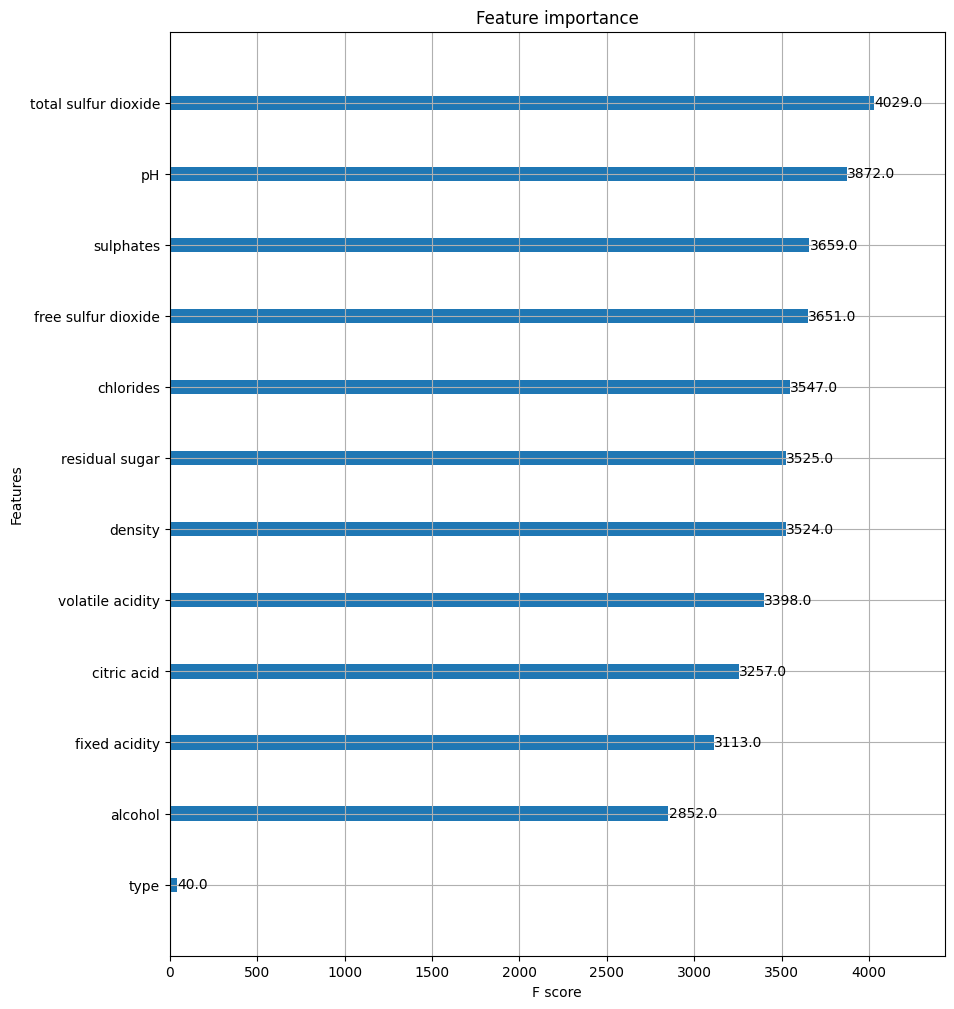

In [52]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(best_xgb_model, ax=ax, importance_type='weight')
plt.show()

### 최종 예측 정리

In [53]:
test_pred = best_xgb_model.predict(test_cleaned)
test_pred = test_pred + 3
submission['quality'] = test_pred
print(submission)

submission.to_csv('xg_boost_submission.csv', index=False)

     index  quality
0        0        5
1        1        5
2        2        6
3        3        5
4        4        6
..     ...      ...
995    995        6
996    996        5
997    997        5
998    998        6
999    999        6

[1000 rows x 2 columns]


In [54]:
# from google.colab import files
# files.download('xg_boost_submission.csv')

## Light GBM
리더보드 점수: 0.703

### 전처리

In [45]:
train = train.copy()
test = test.copy()

train_df = train
test_df = test

# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train_df['type'])
le.fit(test_df['type'])

train_df['type'] = le.fit_transform(train_df['type'])
test_df['type'] = le.transform(test_df['type'])

# Feature Engineering
train_df['sulfur_dioxide_ratio'] = train_df['free sulfur dioxide'] / (train_df['total sulfur dioxide'])
test_df['sulfur_dioxide_ratio'] = test_df['free sulfur dioxide'] / (test_df['total sulfur dioxide'])

train_df['fixed_to_volatile_acidity'] = train_df['fixed acidity'] / (train_df['volatile acidity'])
test_df['fixed_to_volatile_acidity'] = test_df['fixed acidity'] / (test_df['volatile acidity'])

In [46]:
X = train_df.drop(columns=['quality'])
y = train_df['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 모델 구현

In [47]:
# Classificiation Report

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 200, verbose = -1)
lgbm_clf.fit(X_train,y_train)
y_pred = lgbm_clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.45      0.14      0.22        35
           5       0.69      0.70      0.69       351
           6       0.65      0.72      0.68       493
           7       0.62      0.58      0.60       183
           8       0.86      0.35      0.50        34
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1100
   macro avg       0.47      0.36      0.38      1100
weighted avg       0.65      0.66      0.65      1100



### 하이퍼파라미터 튜닝

In [48]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier

params = {'num_leaves':[50,100],
           'n_estimators':[500,600],
           'max_depth':[50,100]}

lgbm_clf = LGBMClassifier(verbose = -1)

stratified_kfold = StratifiedKFold(n_splits = 3, shuffle=True, random_state = 42)

grid_lgbm = GridSearchCV(lgbm_clf, param_grid = params, cv = stratified_kfold, n_jobs = -1, scoring = 'accuracy',verbose = 1)
grid_lgbm.fit(X,y)
print('Best Parameters:', grid_lgbm.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'max_depth': 50, 'n_estimators': 500, 'num_leaves': 50}


In [49]:
lgbm_clf = LGBMClassifier(max_depth = 50, n_estimators = 500, num_leaves = 100,verbose = -1)
lgbm_clf.fit(X,y,eval_metric = 'logloss')
pred = lgbm_clf.predict(test_df)

submission['quality'] = pred
submission

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,5
997,997,5
998,998,6


### 피처 중요도

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

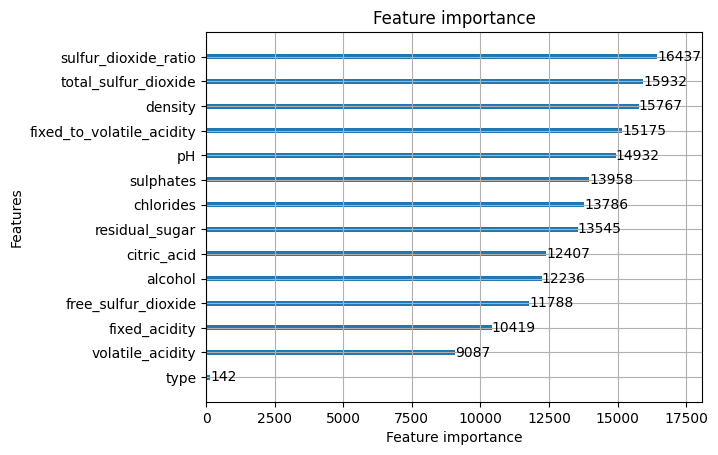

In [30]:
from lightgbm import plot_importance
plot_importance(lgbm_clf)

### 최종 예측 정리

In [31]:
submission.to_csv('lightgbm1.csv', index=False)

# 4. 앙상블

## Voting
리더보드 점수: 0.707

In [32]:
X = train_df.drop(columns=['quality'])
y = train_df['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Classificiation Report

from sklearn.ensemble import VotingClassifier

vo_clf = VotingClassifier(estimators = [('RF',best_rf_model),('GBM',gbm_clf),('XGBoost',best_xgb_model),('LGBM',lgbm_clf)],voting = 'soft')
vo_clf.fit(X_train,y_train)
y_pred = vo_clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

In [34]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

vo_clf = VotingClassifier(estimators = [('RF',best_rf_model),('GBM',gbm_clf),('XGBoost',best_xgb_model),('LGBM',lgbm_clf)],voting = 'soft')
vo_clf.fit(X, y)

In [35]:
pred = vo_clf.predict(test_df)
submission['quality'] = pred
submission

In [36]:
submission.to_csv('VotingClassifier.csv', index = False)

## Stacking

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### 단일 모델 4개, 메타 모델 = 로지스틱

리더보드 점수 :0.66

In [65]:
X = train_df.drop(columns=['quality'])
y = train_df['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
import numpy as np
from sklearn.linear_model import LogisticRegression

base_models = [
    ('rf', best_rf_model),
    ('gbm', grid_gbm.best_estimator_),
    ('xgb', best_xgb_model),
    ('lgbm', grid_lgbm.best_estimator_)
]

In [68]:
# y_train 클래스 레이블 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# 교차 검증 설정
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# 메타 특징 배열 초기화
train_meta_features = np.zeros((X_train.shape[0], len(base_models)))
test_meta_features = np.zeros((test.shape[0], len(base_models)))

# 교차 검증을 통해 base model 훈련 및 메타 특징 생성
for i, (name, model) in enumerate(base_models):
    test_fold_preds = []  # 테스트 데이터의 교차 검증 평균 예측을 위한 리스트

    for train_idx, valid_idx in kf.split(X_train):
        X_fold_train, X_fold_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_fold_train, y_fold_valid = y_train_encoded[train_idx], y_train_encoded[valid_idx]

        # 기본 모델 학습
        model.fit(X_fold_train, y_fold_train)

        # 검증 데이터 예측을 메타 특징에 저장
        train_meta_features[valid_idx, i] = model.predict(X_fold_valid)

        # 테스트 데이터 예측을 저장 후 평균으로 사용할 준비
        test_fold_preds.append(model.predict(test))

    # 테스트 데이터에 대한 교차 검증 예측 평균을 메타 특징에 추가
    test_meta_features[:, i] = np.mean(test_fold_preds, axis=0)

# 메타 모델 (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(train_meta_features, y_train_encoded)

LogisticRegression()

In [69]:
# 최종 예측
stack_pred = meta_model.predict(test_meta_features)
stack_pred_original = label_encoder.inverse_transform(stack_pred)  # 예측값을 원래 클래스 형태로 변환
submission['quality'] = stack_pred_original
submission.to_csv('Stacking_Logistic_submission.csv', index=False)

# Colab에서 파일 다운로드
from google.colab import files
files.download('Stacking_Logistic_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 단일 모델 4개, 메타 모델 = light gbm

리더보드 점수 : 0.665

In [51]:
X = train_df.drop(columns=['quality'])
y = train_df['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
import numpy as np
from sklearn.linear_model import LogisticRegression

base_models = [
    ('rf', best_rf_model),
    ('gbm', grid_gbm.best_estimator_),
    ('xgb', best_xgb_model),
    ('lgbm', grid_lgbm.best_estimator_)
]

In [53]:
# y_train 클래스 레이블 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# 교차 검증 설정
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# 메타 특징 배열 초기화
train_meta_features = np.zeros((X_train.shape[0], len(base_models)))
test_meta_features = np.zeros((test.shape[0], len(base_models)))

# 교차 검증을 통해 base model 훈련 및 메타 특징 생성
for i, (name, model) in enumerate(base_models):
    test_fold_preds = []  # 테스트 데이터의 교차 검증 평균 예측을 위한 리스트

    for train_idx, valid_idx in kf.split(X_train):
        X_fold_train, X_fold_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_fold_train, y_fold_valid = y_train_encoded[train_idx], y_train_encoded[valid_idx]

        # 기본 모델 학습
        model.fit(X_fold_train, y_fold_train)

        # 검증 데이터 예측을 메타 특징에 저장
        train_meta_features[valid_idx, i] = model.predict(X_fold_valid)

        # 테스트 데이터 예측을 저장 후 평균으로 사용할 준비
        test_fold_preds.append(model.predict(test))

    # 테스트 데이터에 대한 교차 검증 예측 평균을 메타 특징에 추가
    test_meta_features[:, i] = np.mean(test_fold_preds, axis=0)

# 메타 모델 (LightGBM)
meta_model = LGBMClassifier(n_estimators=100, random_state=42)
meta_model.fit(train_meta_features, y_train_encoded)

LGBMClassifier(random_state=42)

In [54]:
# 최종 예측
stack_pred = meta_model.predict(test_meta_features)
stack_pred_original = label_encoder.inverse_transform(stack_pred)  # 예측값을 원래 클래스 형태로 변환
submission['quality'] = stack_pred_original
submission.to_csv('Stacking_submission.csv', index=False)

# Colab에서 파일 다운로드
from google.colab import files
files.download('Stacking_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 단일 모델 4개, 메타 모델 = rf

리더보드 점수 : 0.675

In [59]:
X = train_df.drop(columns=['quality'])
y = train_df['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
import numpy as np
from sklearn.linear_model import LogisticRegression

base_models = [
    ('rf', best_rf_model),
    ('gbm', grid_gbm.best_estimator_),
    ('xgb', best_xgb_model),
    ('lgbm', grid_lgbm.best_estimator_)
]

In [63]:
# y_train 클래스 레이블 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# 메타 특징 배열 초기화
train_meta_features = np.zeros((X_train.shape[0], len(base_models)))
test_meta_features = np.zeros((test.shape[0], len(base_models)))

# 교차 검증을 통해 base model 훈련 및 메타 특징 생성
for i, (name, model) in enumerate(base_models):
    test_fold_preds = []  # 테스트 데이터의 교차 검증 평균 예측을 위한 리스트

    for train_idx, valid_idx in kf.split(X_train):
        X_fold_train, X_fold_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_fold_train, y_fold_valid = y_train_encoded[train_idx], y_train_encoded[valid_idx]

        # 기본 모델 학습
        model.fit(X_fold_train, y_fold_train)

        # 검증 데이터 예측을 메타 특징에 저장
        train_meta_features[valid_idx, i] = model.predict(X_fold_valid)

        # 테스트 데이터 예측을 저장 후 평균으로 사용할 준비
        test_fold_preds.append(model.predict(test))

    # 테스트 데이터에 대한 교차 검증 예측 평균을 메타 특징에 추가
    test_meta_features[:, i] = np.mean(test_fold_preds, axis=0)

# 메타 모델 (RandomForestClassifier)
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)
meta_model.fit(train_meta_features, y_train_encoded)

RandomForestClassifier(random_state=42)

In [64]:
# 최종 예측
stack_pred = meta_model.predict(test_meta_features)
stack_pred_original = label_encoder.inverse_transform(stack_pred)
submission['quality'] = stack_pred_original
submission.to_csv('stacking_submission.csv', index=False)

# Colab에서 파일 다운로드
from google.colab import files
files.download('Stacking_RF_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### light gbm, xgboost만 이용, 메타모델 = lightgbm

리더보드 점수 : 0.672

In [56]:
import numpy as np
from sklearn.linear_model import LogisticRegression

base_models = [
    ('xgb', best_xgb_model),
    ('lgbm', grid_lgbm.best_estimator_)
]

In [57]:
# y_train 클래스 레이블 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# 교차 검증 설정
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# 메타 특징 배열 초기화
train_meta_features = np.zeros((X_train.shape[0], len(base_models)))
test_meta_features = np.zeros((test.shape[0], len(base_models)))

# 교차 검증을 통해 base model 훈련 및 메타 특징 생성
for i, (name, model) in enumerate(base_models):
    test_fold_preds = []  # 테스트 데이터의 교차 검증 평균 예측을 위한 리스트

    for train_idx, valid_idx in kf.split(X_train):
        X_fold_train, X_fold_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_fold_train, y_fold_valid = y_train_encoded[train_idx], y_train_encoded[valid_idx]

        # 기본 모델 학습
        model.fit(X_fold_train, y_fold_train)

        # 검증 데이터 예측을 메타 특징에 저장
        train_meta_features[valid_idx, i] = model.predict(X_fold_valid)

        # 테스트 데이터 예측을 저장 후 평균으로 사용할 준비
        test_fold_preds.append(model.predict(test))

    # 테스트 데이터에 대한 교차 검증 예측 평균을 메타 특징에 추가
    test_meta_features[:, i] = np.mean(test_fold_preds, axis=0)

# 메타 모델 (LightGBM)
meta_model = LGBMClassifier(n_estimators=100, random_state=42)
meta_model.fit(train_meta_features, y_train_encoded)

LGBMClassifier(random_state=42)

In [58]:
# 최종 예측
stack_pred = meta_model.predict(test_meta_features)
stack_pred_original = label_encoder.inverse_transform(stack_pred)  # 예측값을 원래 클래스 형태로 변환
submission['quality'] = stack_pred_original
submission.to_csv('Stacking_XG_Light_submission.csv', index=False)

# Colab에서 파일 다운로드
from google.colab import files
files.download('Stacking_XG_Light_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>